In [1]:
setwd("../")

library(millefy)

Warning message:
“replacing previous import ‘IRanges::shift’ by ‘data.table::shift’ when loading ‘millefy’”Warning message:
“replacing previous import ‘IRanges::distance’ by ‘destiny::distance’ when loading ‘millefy’”Warning message:
“replacing previous import ‘data.table::first’ by ‘dplyr::first’ when loading ‘millefy’”Warning message:
“replacing previous import ‘IRanges::slice’ by ‘dplyr::slice’ when loading ‘millefy’”Warning message:
“replacing previous import ‘data.table::between’ by ‘dplyr::between’ when loading ‘millefy’”Warning message:
“replacing previous import ‘IRanges::collapse’ by ‘dplyr::collapse’ when loading ‘millefy’”Warning message:
“replacing previous import ‘IRanges::intersect’ by ‘dplyr::intersect’ when loading ‘millefy’”Warning message:
“replacing previous import ‘data.table::last’ by ‘dplyr::last’ when loading ‘millefy’”Warning message:
“replacing previous import ‘IRanges::setdiff’ by ‘dplyr::setdiff’ when loading ‘millefy’”Warning message:
“replacing previous imp

In [2]:
bam_files <- list.files("test_data/_01_filterBam", "*.bam$", recursive = T, full.names = T)
bam_files

[1] "test_data/_01_filterBam/RamDA_00h_A04/RamDA_00h_A04.bam"
 [2] "test_data/_01_filterBam/RamDA_00h_A05/RamDA_00h_A05.bam"
 [3] "test_data/_01_filterBam/RamDA_00h_A06/RamDA_00h_A06.bam"
 [4] "test_data/_01_filterBam/RamDA_00h_A07/RamDA_00h_A07.bam"
 [5] "test_data/_01_filterBam/RamDA_00h_A08/RamDA_00h_A08.bam"
 [6] "test_data/_01_filterBam/RamDA_12h_A04/RamDA_12h_A04.bam"
 [7] "test_data/_01_filterBam/RamDA_12h_A05/RamDA_12h_A05.bam"
 [8] "test_data/_01_filterBam/RamDA_12h_A06/RamDA_12h_A06.bam"
 [9] "test_data/_01_filterBam/RamDA_12h_A07/RamDA_12h_A07.bam"
[10] "test_data/_01_filterBam/RamDA_12h_A08/RamDA_12h_A08.bam"
[11] "test_data/_01_filterBam/RamDA_24h_A04/RamDA_24h_A04.bam"
[12] "test_data/_01_filterBam/RamDA_24h_A05/RamDA_24h_A05.bam"
[13] "test_data/_01_filterBam/RamDA_24h_A06/RamDA_24h_A06.bam"
[14] "test_data/_01_filterBam/RamDA_24h_A07/RamDA_24h_A07.bam"
[15] "test_data/_01_filterBam/RamDA_24h_A08/RamDA_24h_A08.bam"
[16] "test_data/_01_filterBam/RamDA_48h_A04/RamDA_48h_A04.bam"
[17] "test_data/_01_filterBam/RamDA_48h_A05/RamDA_48h_A05.bam"
[18] "test_data/_01_filterBam/RamDA_48h_A06/RamDA_48h_A06.bam"
[19] "test_data/_01_filterBam/RamDA_48h_A07/RamDA_48h_A07.bam"
[20] "test_data/_01_filterBam/RamDA_48h_A08/RamDA_48h_A08.bam"
[21] "test_data/_01_filterBam/RamDA_72h_A04/RamDA_72h_A04.bam"
[22] "test_data/_01_filterBam/RamDA_72h_A05/RamDA_72h_A05.bam"
[23] "test_data/_01_filterBam/RamDA_72h_A06/RamDA_72h_A06.bam"
[24] "test_data/_01_filterBam/RamDA_72h_A07/RamDA_72h_A07.bam"
[25] "test_data/_01_filterBam/RamDA_72h_A08/RamDA_72h_A08.bam"

In [3]:
bwfiles = list.files("test_data/bw_test/", full.names = TRUE)[1:25]
bwfiles

[1] "test_data/bw_test//RamDA_00h_A04.bw" "test_data/bw_test//RamDA_00h_A05.bw"
 [3] "test_data/bw_test//RamDA_00h_A06.bw" "test_data/bw_test//RamDA_00h_A07.bw"
 [5] "test_data/bw_test//RamDA_00h_A08.bw" "test_data/bw_test//RamDA_00h_A09.bw"
 [7] "test_data/bw_test//RamDA_00h_A10.bw" "test_data/bw_test//RamDA_00h_A11.bw"
 [9] "test_data/bw_test//RamDA_00h_A12.bw" "test_data/bw_test//RamDA_00h_B01.bw"
[11] "test_data/bw_test//RamDA_00h_B02.bw" "test_data/bw_test//RamDA_00h_B03.bw"
[13] "test_data/bw_test//RamDA_00h_B04.bw" "test_data/bw_test//RamDA_00h_B05.bw"
[15] "test_data/bw_test//RamDA_00h_B06.bw" "test_data/bw_test//RamDA_00h_B07.bw"
[17] "test_data/bw_test//RamDA_00h_B08.bw" "test_data/bw_test//RamDA_00h_B09.bw"
[19] "test_data/bw_test//RamDA_00h_B10.bw" "test_data/bw_test//RamDA_00h_B11.bw"
[21] "test_data/bw_test//RamDA_00h_B12.bw" "test_data/bw_test//RamDA_00h_C01.bw"
[23] "test_data/bw_test//RamDA_00h_C02.bw" "test_data/bw_test//RamDA_00h_C03.bw"
[25] "test_data/bw_test//RamDA_00h_C04.bw"

In [4]:
# 遺伝子モデルの読み込み（一度だけ実行; 少し時間がかかる）
path_gtf1 <- "test_data/gencode.vM9.annotation.gtf"
dt_gtf_exon1 <- gtfToDtExon(path_gtf1)

Read 1592031 rows and 9 (of 9) columns from 0.735 GB file in 00:00:25


In [5]:
labels <- gsub(".bam", "", basename(bam_files))
labels

[1] "RamDA_00h_A04" "RamDA_00h_A05" "RamDA_00h_A06" "RamDA_00h_A07"
 [5] "RamDA_00h_A08" "RamDA_12h_A04" "RamDA_12h_A05" "RamDA_12h_A06"
 [9] "RamDA_12h_A07" "RamDA_12h_A08" "RamDA_24h_A04" "RamDA_24h_A05"
[13] "RamDA_24h_A06" "RamDA_24h_A07" "RamDA_24h_A08" "RamDA_48h_A04"
[17] "RamDA_48h_A05" "RamDA_48h_A06" "RamDA_48h_A07" "RamDA_48h_A08"
[21] "RamDA_72h_A04" "RamDA_72h_A05" "RamDA_72h_A06" "RamDA_72h_A07"
[25] "RamDA_72h_A08"

In [6]:
groups <- gsub("_.+", "", gsub("RamDA_", "", labels))
groups

[1] "00h" "00h" "00h" "00h" "00h" "12h" "12h" "12h" "12h" "12h" "24h" "24h"
[13] "24h" "24h" "24h" "48h" "48h" "48h" "48h" "48h" "72h" "72h" "72h" "72h"
[25] "72h"

In [7]:
color_labels <- colorRampPalette(c("yellow", "red"))(length(unique(groups))+1)[1:length(unique(groups))]
color_labels

[1] "#FFFF00" "#FFCC00" "#FF9900" "#FF6500" "#FF3200"

In [8]:
# BAMのリード数から計算した Normalization factor (テストなどで適当な値を入れている; あとで変える)
nf = rep(1, length(bam_files))
nf

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [9]:
# トラックの指定
scTrackBw <- list(path_bam_files = bwfiles, groups = groups, group_colors = color_labels, max_value = 7873, isBw=TRUE)
cvTrack1 <- list(path_bam_files = bam_files[21:24], normFactor = nf[21:24], groups = c("A", "B", "C", "D"), trackHeight = 2, log=TRUE)
geneTrack1 <- list(path_gtf = path_gtf1, dt_gtf = dt_gtf_exon1, label = basename(path_gtf1))
tdlist <- list(scTrackBw, cvTrack1, geneTrack1)
tt <- c("sc","add", "gene")
heights = c(12, 4, 2)


In [10]:
# 領域の指定
chr =  "chr19"
start = 5824708
end = 5845478
text_main = sprintf("%s, RamDA time series", "Neat1")

[1] "Begin millefyPlot4: 2018-03-30 02:26:08"
[1] "title" "sc"    "avg"   "add"   "gene"  "axis" 
[1] "Importing BigWig: 2018-03-30 02:26:08"
[1] "Start importing BAM: 2018-03-30 02:26:16"
[1] "End importing BAM: 2018-03-30 02:26:18"
[1] "Finished millefyPlot4: 2018-03-30 02:26:20"


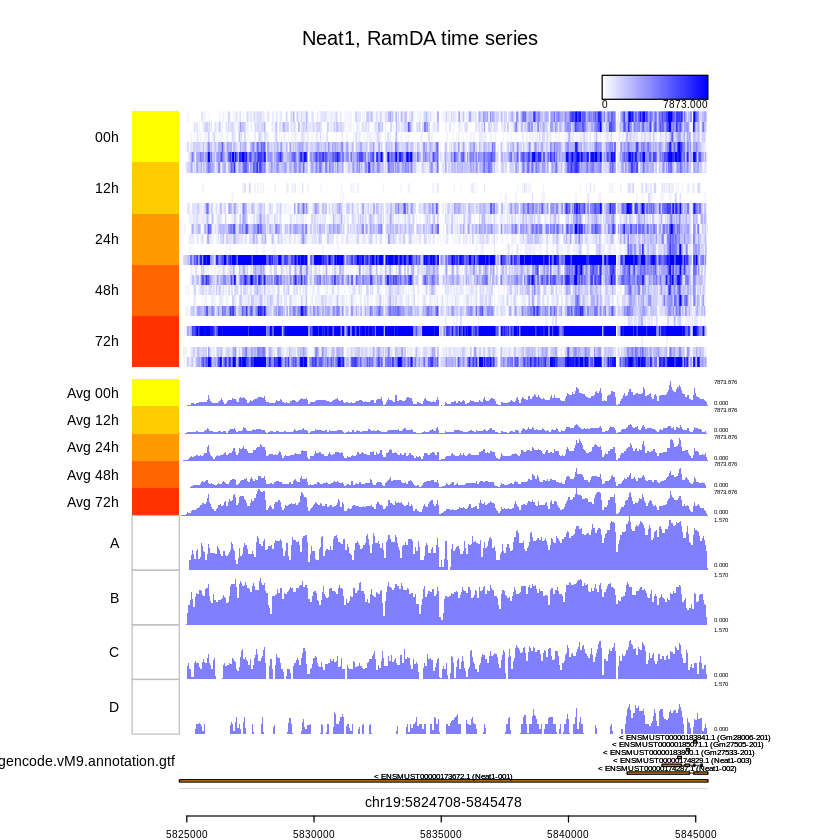

In [11]:
# 実行
l <- millefyPlot4(track_data=tdlist, track_type=tt, heights=heights, sc_type = "heatmap", chr = chr, start = start, end = end, sc_avg = TRUE, sc_avg_height = 1, title = text_main)

[1] "Begin millefyPlot4: 2018-03-30 02:26:20"
[1] "title" "sc"    "avg"   "add"   "gene"  "axis" 
Eigenvalue of DC1: 0.884115
[1] "Finished millefyPlot4: 2018-03-30 02:26:23"


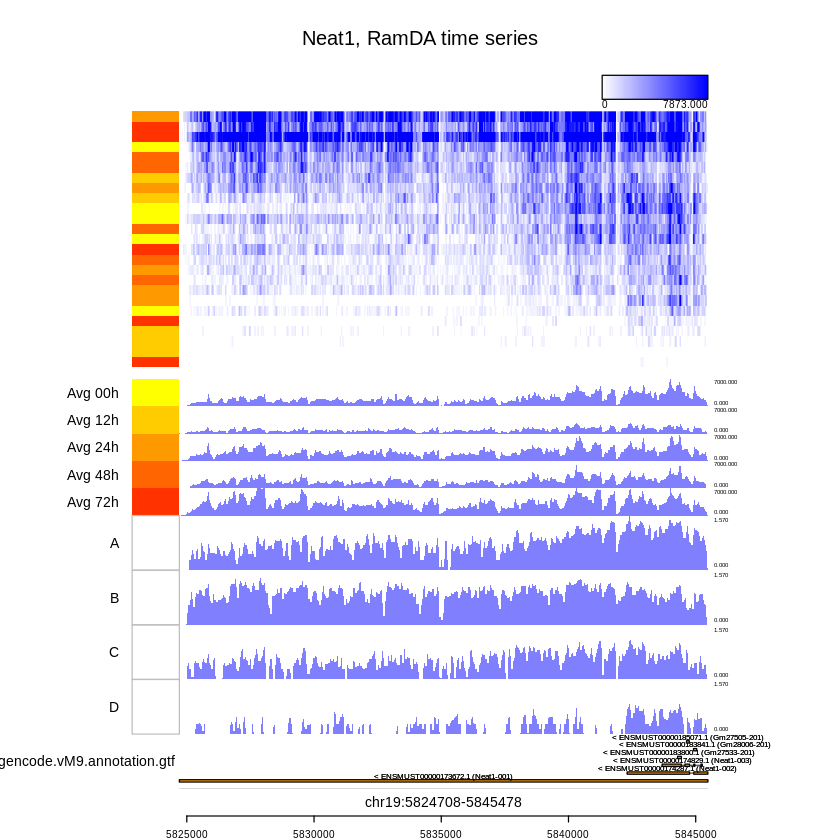

In [12]:
# re-plot
invisible(millefyPlot4(track_data=l$track_data, track_type=l$track_type, heights=l$heights, sc_type = "heatmap", chr = chr, start = start, end = end, sc_avg = TRUE, sc_avg_height = 1, title = text_main, sc_avg_scale = 7000, sc_sort_destiny = 'all'))


[1] "Begin millefyPlot4: 2018-03-30 02:26:23"
[1] "title" "sc"    "avg"   "add"   "gene"  "axis" 
Eigenvalue of DC1: 0.884115
[1] "Finished millefyPlot4: 2018-03-30 02:26:26"


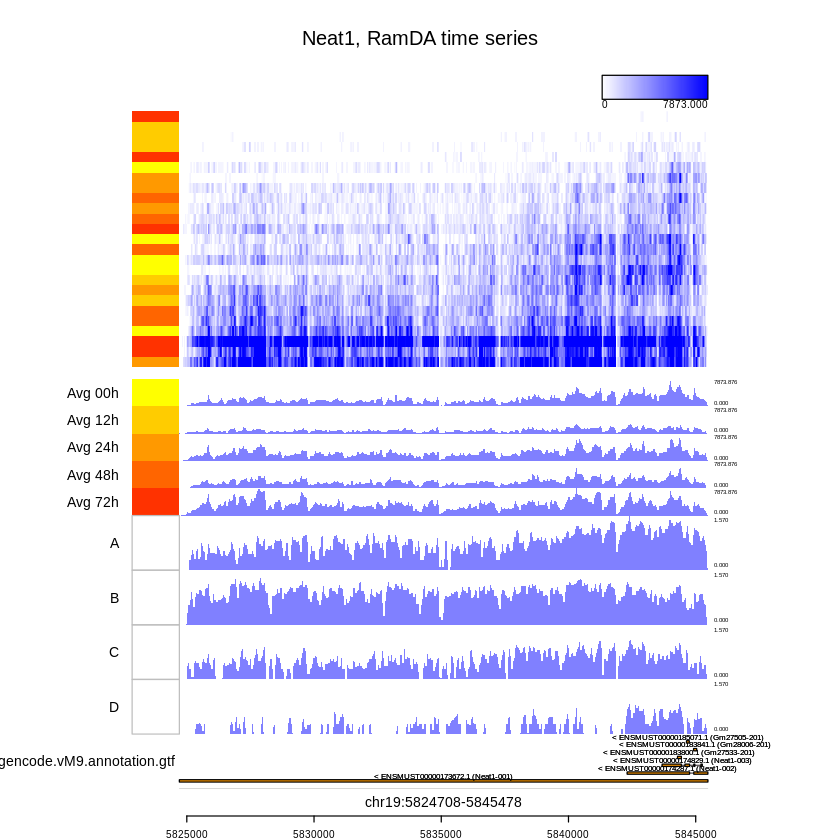

In [13]:
invisible(millefyPlot4(track_data=l$track_data, track_type=l$track_type, heights=l$heights, sc_type = "heatmap", chr = chr, start = start, end = end, sc_avg = TRUE, sc_avg_height = 1, title = text_main, sc_sort_destiny = 'all'))


[1] "Begin millefyPlot4: 2018-03-30 02:26:27"
[1] "title" "sc"    "avg"   "add"   "gene"  "axis" 
Eigenvalue of DC1: 0.884115
[1] "Finished millefyPlot4: 2018-03-30 02:26:27"


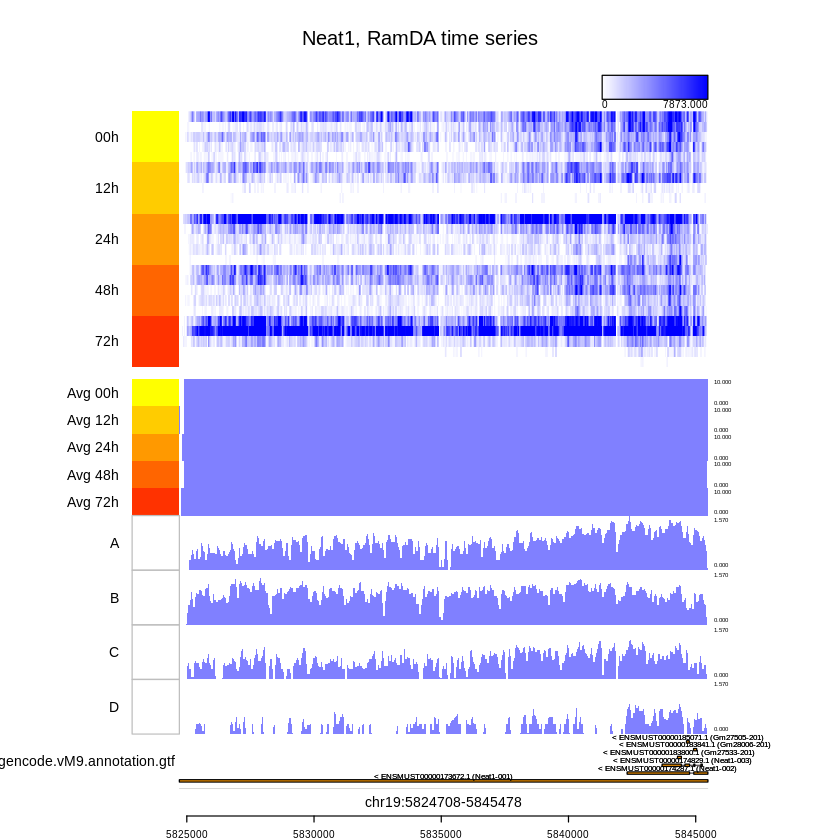

In [14]:
invisible(
	millefyPlot4(track_data=l$track_data, track_type=l$track_type, heights=l$heights, sc_type = "heatmap", chr = chr, start = start, end = end, sc_avg = TRUE, sc_avg_height = 1, title = text_main, sc_avg_scale = 10, sc_sort_destiny = 'group')
)

[1] "Begin millefyPlot4: 2018-03-30 02:26:28"
[1] "title" "sc"    "avg"   "add"   "gene"  "axis" 
Eigenvalue of DC1: 0.884115
[1] "Finished millefyPlot4: 2018-03-30 02:26:29"


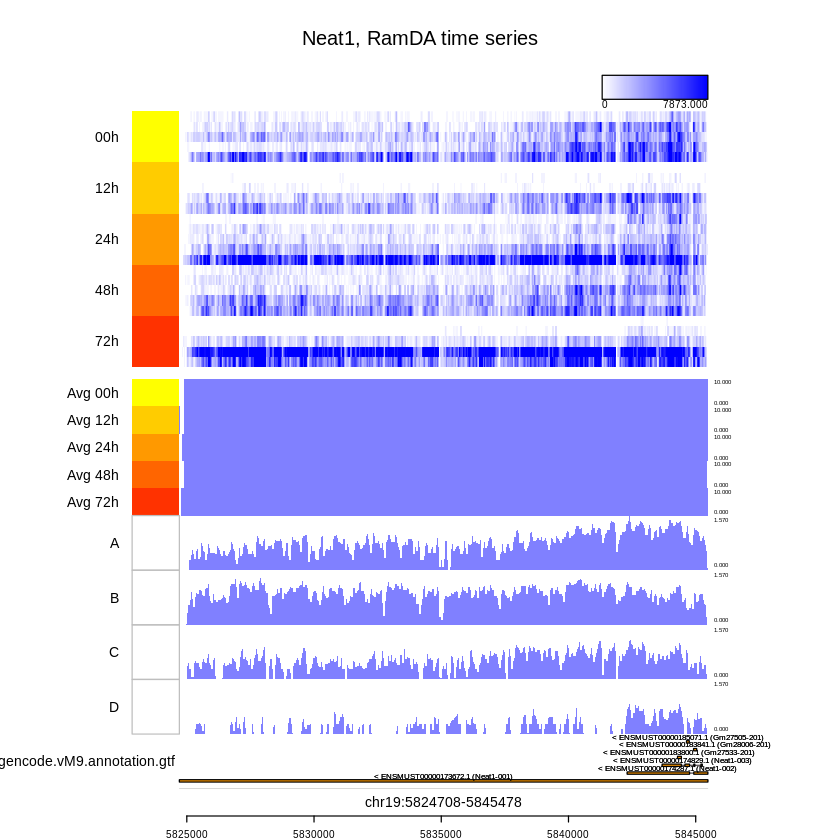

In [15]:

invisible(
	millefyPlot4(track_data=l$track_data, track_type=l$track_type, heights=l$heights, sc_type = "heatmap", chr = chr, start = start, end = end, sc_avg = TRUE, sc_avg_height = 1, title = text_main, sc_avg_scale = 10, sc_sort_destiny = 'group')
)

[1] "Begin millefyPlot4: 2018-03-30 02:26:29"
[1] "title" "sc"    "avg"   "add"   "gene"  "axis" 
Eigenvalue of DC1: 0.884115
[1] "Finished millefyPlot4: 2018-03-30 02:26:30"


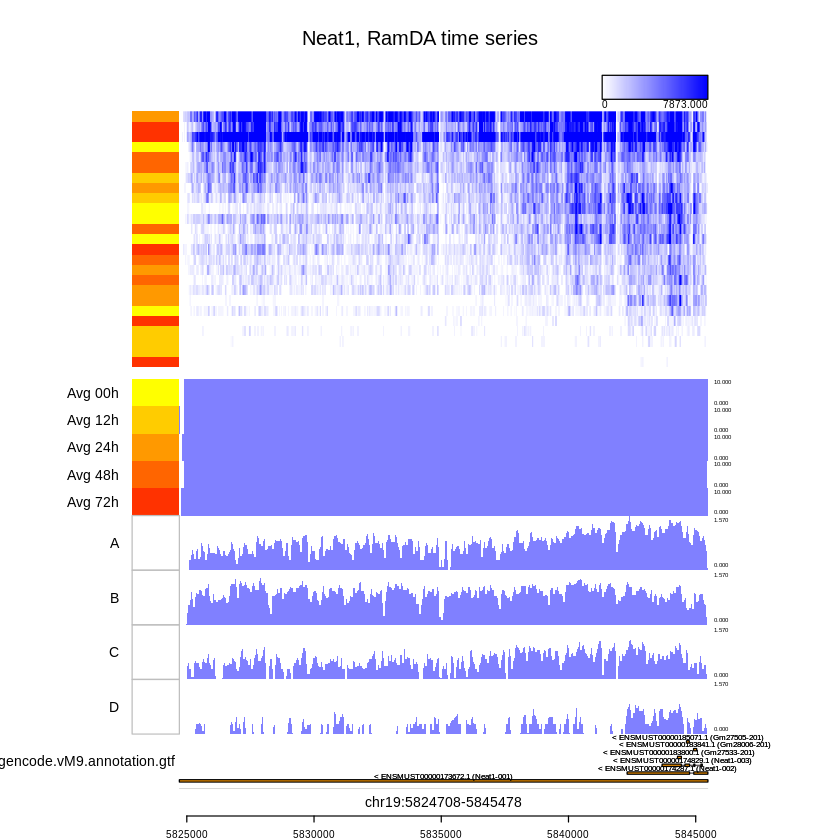

In [16]:
invisible(
	millefyPlot4(
		track_data=l$track_data, track_type=l$track_type, heights=l$heights, 
		sc_type = "heatmap", 
		chr = chr, start = start, end = end, 
		sc_avg = TRUE, sc_avg_height = 1, 
		title = text_main, sc_avg_scale = 10, sc_sort_destiny = 'all'
	)
)

